#  Quantum Computing Project: "Quantum Code Breaker"

**Due Date:** December 14, 2025 

##  Learning Objectives
- Master quantum state creation and measurement (Session 1)
- Build circuits using quantum gates (Session 2)
- Implement Deutsch and Bernstein-Vazirani algorithms (Session 3)
- Understand the power of quantum computing over classical

### How to Use This Notebook
1. Read the description before each code cell to understand the goal.
2. Follow the numbered TODO comments and replace the placeholder returns.
3. Run `run_all_tests()` after finishing each part to self-check your work.
4. If you get stuck, revisit the Session notebooks or compare with instructor hints.

---


##  Project Structure

### Part 1: Quantum Basics Applications (30 points)
*Everything here relies on Session 1 concepts about superposition and measurement. Each task builds toward storing and transmitting classical information quantum mechanically.*

#### Task 1.1: Quantum Random Number Generator
You will build a 1-qubit circuit that produces unbiased random bits. Follow the inline TODO comments inside the code cell:
1. Create a superposition with a Hadamard gate.
2. Measure the qubit to collapse it to `0` or `1`.
3. Run the circuit on the simulator and return the most likely bit.
4. Repeat the process to assemble a multi-bit key.


##  Learning Objectives
- Master quantum state creation and measurement (Session 1)
- Build circuits using quantum gates (Session 2)
- Implement Deutsch and Bernstein-Vazirani algorithms (Session 3)
- Understand the power of quantum computing over classical

---

##  Project Structure

### Part 1: Quantum Basics Applications (30 points)
*Building on Session 1 concepts*

#### Task 1.1: Quantum Random Number Generator
Build a true quantum random number generator for cryptographic keys.

In [44]:
# Setup: import everything you need for the project
# These helpers are provided so you can focus on the quantum concepts.
from typing import Dict
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

# We'll reuse the same local simulator for every experiment in this project.
SIMULATOR = AerSimulator()


def run_counts(circuit: QuantumCircuit, shots: int = 1024) -> Dict[str, int]:
    """Execute a circuit on the simulator and return measurement counts."""
    compiled = transpile(circuit, SIMULATOR)
    job = SIMULATOR.run(compiled, shots=shots)
    return job.result().get_counts()


def most_likely_bitstring(counts: Dict[str, int]) -> str:
    """Return the bitstring that appears most often in the counts dictionary."""
    return max(counts, key=counts.get)


#### Task 1.2: Quantum State Encoder
Transform classical bits into quantum states. Use the TODO markers to:
- Flip the qubit when the incoming bit is `1`.
- Apply a Hadamard so the message lives in a superposition.
- Later, undo the Hadamard, measure, and convert the result back to an integer.


In [9]:
def quantum_random_bit(shots: int = 1) -> int:
    """Generate a single random classical bit using a quantum circuit."""
    circuit = QuantumCircuit(1, 1)

    # TODO: Put the qubit into an equal superposition using a Hadamard gate.
    circuit.h(0)

    # TODO: Measure the qubit into the classical register.
    circuit.measure(0,0)

    counts = run_counts(circuit, shots=shots)

    # TODO: Return the most frequent outcome ("0" or "1") as an integer.
    most_likely = most_likely_bitstring(counts)
    
    return most_likely  # Replace with the correct value


def generate_random_key(length: int = 8) -> str:
    """Create a random binary string by repeating the quantum random bit generator."""
    if length <= 0:
        raise ValueError("Key length must be a positive integer.")

    # TODO: Call quantum_random_bit `length` times and collect the results.
    i = 0
    key = ""
    while (i<length):
        bit = quantum_random_bit()
        key = key + str(bit)
        i+=1

    # TODO: Concatenate the bits into a string (example: "10101100").
    return key  # Replace with the generated key


generate_random_key(10)


'0101001010'

def encode_message_in_quantum_state(message_bit: int | str) -> QuantumCircuit:
    """Return a circuit that stores a classical bit in a qubit and adds superposition."""
    bit = int(message_bit)
    if bit not in (0, 1):
        raise ValueError("message_bit must be 0 or 1.")

    circuit = QuantumCircuit(1, 1)

    # TODO: If the bit is 1, flip the qubit into |1⟩ with an X gate.

    # TODO: Apply a Hadamard gate so the message sits in a superposition.

    return circuit


def decode_quantum_message(circuit: QuantumCircuit) -> int:
    """Undo the encoding, measure, and return the recovered classical bit."""
    working = circuit.copy()

    # TODO: Apply the inverse of the Hadamard used during encoding.

    # TODO: Measure the qubit into the classical register.

    counts = run_counts(working, shots=1)

    # TODO: Convert the most frequent bitstring into an integer and return it.
    return None  # Replace with the decoded bit


In [27]:
def create_quantum_message(binary_string: str) -> QuantumCircuit:
    """Build an n-qubit circuit that represents the provided classical message."""
    if not binary_string or any(bit not in "01" for bit in binary_string):
        raise ValueError("binary_string must contain only '0' and '1'.")

    n = len(binary_string)
    print(n)
    circuit = QuantumCircuit(n, n)

    # TODO: Loop over each bit and apply X to qubits that should be |1⟩.
    i=0
    while i<n: 
        if(binary_string[i]=="1"):
            circuit.x(i)
       
        i+=1
    circuit.barrier()
    i=0
    while i<n: 
       
        circuit.h(i)
        i+=1

    # TODO: Apply Hadamard to every qubit to create a superposition of the message. -- Done above.

    return circuit

key = generate_random_key(10)
print(key)
circuit = create_quantum_message(key)

circuit.draw()


1011010011
10


┌───┐ ░ ┌───┐
 q_0: ┤ X ├─░─┤ H ├
      └───┘ ░ ├───┤
 q_1: ──────░─┤ H ├
      ┌───┐ ░ ├───┤
 q_2: ┤ X ├─░─┤ H ├
      ├───┤ ░ ├───┤
 q_3: ┤ X ├─░─┤ H ├
      └───┘ ░ ├───┤
 q_4: ──────░─┤ H ├
      ┌───┐ ░ ├───┤
 q_5: ┤ X ├─░─┤ H ├
      └───┘ ░ ├───┤
 q_6: ──────░─┤ H ├
            ░ ├───┤
 q_7: ──────░─┤ H ├
      ┌───┐ ░ ├───┤
 q_8: ┤ X ├─░─┤ H ├
      ├───┤ ░ ├───┤
 q_9: ┤ X ├─░─┤ H ├
      └───┘ ░ └───┘
c: 10/═════════════

#### Task 1.3: Multi-Qubit Message System
Scale the encoder to full strings. For each bit in the message:
- Use an X gate when the bit is `1` so the qubit starts in `|1⟩` instead of `|0⟩`.
- Apply Hadamard to *every* qubit to place the entire message in superposition.
This prepares you for parallel quantum information processing.


In [35]:
def quantum_NOT_gate(initial_bit: int = 0) -> QuantumCircuit:
    """Use an X gate to flip a single input qubit."""
    bit = int(initial_bit)
    if bit not in (0, 1):
        raise ValueError("initial_bit must be 0 or 1.")

    circuit = QuantumCircuit(1, 1)

    # TODO: If the input should start as |1⟩, apply X before the NOT.
    if(bit == 1):
        circuit.x(0)

    # TODO: Apply the actual NOT (X gate) to flip the qubit.
    circuit.x(0) 

    circuit.measure(0, 0)
    return circuit


def quantum_AND_gate(input_a: int = 1, input_b: int = 1) -> QuantumCircuit:
    """Compute the AND of two inputs using a Toffoli (CCX) gate."""
    a = int(input_a)
    b = int(input_b)
    if a not in (0, 1) or b not in (0, 1):
        raise ValueError("input_a and input_b must be 0 or 1.")

    circuit = QuantumCircuit(3, 1)

    # TODO: Load the desired classical inputs into qubits 0 and 1.
    if(a == 1):
        circuit.x(0)
    if(b == 1):
        circuit.x(1)

    # TODO: Use a CCX (Toffoli) gate with qubits 0 and 1 controlling qubit 2.

    circuit.ccx(0,1,2)
  #  circuit.x(2)
    output = circuit.measure(2, 0)

        
    return circuit

circuit = quantum_AND_gate(1,0)
circuit.draw()
#run_counts(circuit)


┌───┐        
q_0: ┤ X ├──■─────
     └───┘  │     
q_1: ───────■─────
          ┌─┴─┐┌─┐
q_2: ─────┤ X ├┤M├
          └───┘└╥┘
c: 1/═══════════╩═
                0

---

### Part 2: Quantum Gates Mastery (30 points)
*Session 2 introduced reversible logic and phase kickback. These exercises reinforce those skills while keeping the instructions bite-sized and explicit.*

#### Task 2.1: Quantum Logic Gates Circuit
Implement classic Boolean logic with quantum gates:
- Build a NOT gate with a single X operation.
- Create an AND gate using the Toffoli (CCX) gate. The inline comments walk you through setting the inputs and measuring the output.


In [37]:
def phase_encode_secret(secret_bit: int | str) -> QuantumCircuit:
    """Hide a classical bit in the phase of a qubit and then reveal it."""
    bit = int(secret_bit)
    if bit not in (0, 1):
        raise ValueError("secret_bit must be 0 or 1.")

    circuit = QuantumCircuit(1, 1)

    # Step 1: Create an equal superposition.
    circuit.h(0)

    # TODO: If the secret bit is 1, apply a Z gate to flip the phase.
    a = int(secret_bit)
    if(a==1):
        circuit.z(0)

    # TODO: Apply another Hadamard so the phase difference turns into a measurable bit.
    circuit.h(0)

    circuit.measure(0, 0)
    return circuit

circuit = phase_encode_secret(1)
circuit.draw()

┌───┐┌───┐┌───┐┌─┐
  q: ┤ H ├┤ Z ├┤ H ├┤M├
     └───┘└───┘└───┘└╥┘
c: 1/════════════════╩═
                     0

#### Task 2.2: Quantum Phase Encryption
Hide information inside a phase:
1. Start with a Hadamard to create superposition.
2. Conditionally apply a Z gate if the secret bit equals 1.
3. Add another Hadamard so the hidden phase becomes a measurable bit.


{'11': 512, '00': 488}


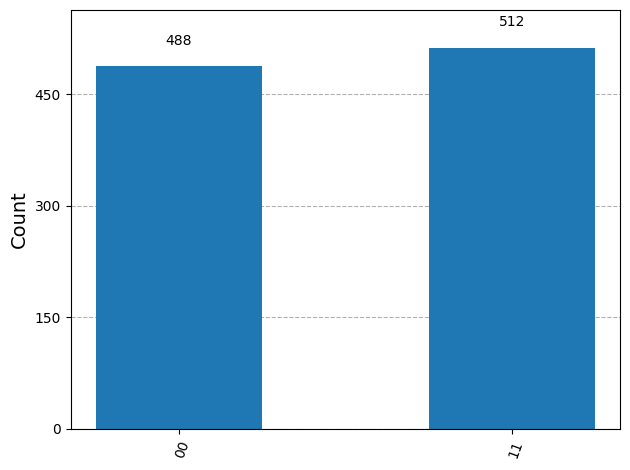

In [51]:
def create_bell_pair() -> QuantumCircuit:
    """Create a Bell state (|00⟩ + |11⟩)/√2 ready for measurement."""
    circuit = QuantumCircuit(2, 2)

    # TODO: Place the first qubit into superposition with a Hadamard.
    circuit.h(0)

    # TODO: Entangle the second qubit using a controlled-NOT (CNOT).
    circuit.cx(0,1)

    circuit.measure([0, 1], [1, 0])
    return circuit




def test_entanglement(shots: int = 1000):
    """Run the Bell pair experiment multiple times to confirm correlated results."""
    # TODO: Execute the create_bell_pair circuit using run_counts.
    circuit = create_bell_pair()
    counts = run_counts(circuit,shots)
    # TODO: Display the counts (plot_histogram is a handy option).
    

    # TODO: Assert that only "00" or "11" appear in the results.
    
  #  if bit not in (0, 1):
   #     raise ValueError("secret_bit must be 0 or 1.")
    


    return counts  # Replace with the measurement counts when complete

counts = test_entanglement()
print(counts)
plot_histogram(counts)    #had to do it like this because otherwise Jupyter Notebook won't display the plot


#### Task 2.3: Entangled Pairs Generator
Create and verify a Bell state. Use the TODOs to:
- Add a Hadamard and CNOT to entangle two qubits.
- Measure both qubits and collect results across many shots.
- Ensure only the perfectly correlated outcomes `00` and `11` appear.


In [29]:
def deutsch_algorithm(oracle_gate) -> QuantumCircuit:
    """Construct Deutsch's algorithm circuit around the provided oracle gate."""
    circuit = QuantumCircuit(2, 1)

    # TODO: Prepare the ancilla qubit in |1⟩.
    circuit.x(0)
    circuit.barrier()

    # TODO: Apply Hadamard gates to both qubits before consulting the oracle.
    circuit.h(0)
    circuit.h(1)

    circuit.barrier()
    
    # TODO: Append the oracle gate to the circuit.
    if oracle_gate == "constant":
        create_constant_oracle()
    else: 
        create_balanced_oracle()

    # TODO: Apply a final Hadamard to the input qubit and measure it.
    circuit.h(1)
    circuit.measure(1,0)

    return circuit


def create_constant_oracle(value: int = 0):
    """Build a two-qubit oracle that always returns the same classical value."""
    circuit = QuantumCircuit(2)
    if value == 1:
        # TODO: Flip the ancilla output so the oracle emulates f(x) = 1.
        circuit.x(0)
        pass
    return circuit.to_gate(label="Constant Oracle")


def create_balanced_oracle():
    """Build an oracle that returns different values for x=0 and x=1."""
    circuit = QuantumCircuit(2)
    # TODO: Use a controlled gate so f(0) = 0 and f(1) = 1.
    return circuit.to_gate(label="Balanced Oracle")


def run_deutsch(oracle_gate) -> str:
    """Execute Deutsch's algorithm and return '0' for constant or '1' for balanced."""
    # TODO: Run the deutsch_algorithm circuit on the simulator.
    result = deutsch_algorithm(oracle_gate)
    print(result)

    counts = run_counts(result)
#    result_string = str(counts)
    
    
    # TODO: Return the single-bit result as a string.
    return ""  # Replace with the measurement outcome

result = run_deutsch("constant")


     ┌───┐ ░ ┌───┐ ░         
q_0: ┤ X ├─░─┤ H ├─░─────────
     └───┘ ░ ├───┤ ░ ┌───┐┌─┐
q_1: ──────░─┤ H ├─░─┤ H ├┤M├
           ░ └───┘ ░ └───┘└╥┘
c: 1/══════════════════════╩═
                           0 


---

### Part 3: Quantum Algorithms Implementation (35 points)
*Session 3 focused on structured oracles. Each task introduces a famous algorithm and the TODO comments guide you through the required gates.*

#### Task 3.1: Mystery Function Identifier (Deutsch Algorithm)
Follow the inline cues to prepare the ancilla, apply Hadamards, insert the oracle, and read the result. The helper `run_deutsch` should execute your circuit and return `'0'` or `'1'`.


In [ ]:
def build_bv_oracle(secret_string: str):
    """Create a Bernstein-Vazirani oracle gate that hides the provided bit string."""
    if not secret_string or any(bit not in "01" for bit in secret_string):
        raise ValueError("secret_string must contain only '0' and '1'.")

    n = len(secret_string)
    circuit = QuantumCircuit(n + 1)

    # TODO: For every '1' in the secret string, add a CNOT from that qubit to the ancilla.

    return circuit.to_gate(label=f"BV_{secret_string}")


def bernstein_vazirani_algorithm(secret_string: str, oracle_gate=None) -> QuantumCircuit:
    """Assemble the Bernstein-Vazirani circuit for the hidden bit string."""
    n = len(secret_string)
    circuit = QuantumCircuit(n + 1, n)

    # TODO: Prepare the ancilla in |1⟩ using an X gate.

    # TODO: Apply Hadamard to every qubit (inputs and ancilla).

    # TODO: Use the provided oracle gate (or build one) to encode the secret string.

    # TODO: Apply Hadamard to the input qubits to reveal the secret.

    # TODO: Measure each input qubit into the classical registers (map qubit i → classical bit n-1-i).

    return circuit


def verify_secret_string(secret_string: str) -> str:
    """Run the Bernstein-Vazirani circuit and confirm the recovered string."""
    # TODO: Execute the bernstein_vazirani_algorithm on the simulator.

    # TODO: Print and return the recovered bit string.
    return ""  # Replace with the recovered secret


#### Task 3.2: Secret String Finder (Bernstein-Vazirani Algorithm)
Use the scaffolded code to:
- Build an oracle that applies CNOTs for each `1` in the secret string.
- Prepare and measure the inputs exactly once to discover the entire string.
- Verify your work with `verify_secret_string`.


In [ ]:
def classical_find_secret(oracle, n_bits: int) -> tuple[str, int]:
    """Use a classical strategy that queries the oracle once per bit position."""
    if n_bits <= 0:
        raise ValueError("n_bits must be positive.")

    secret_bits: list[str] = []
    queries = 0

    # TODO: For each position, craft a bit string with a single '1' and query the oracle.

    # TODO: Record the returned bit and increase the query counter.

    return "".join(secret_bits), queries


def quantum_vs_classical_comparison(secret: str = "10110") -> None:
    """Show how the quantum approach recovers the secret in one oracle call."""
    print("=== Quantum vs Classical ===")
    print(f"Hidden secret: {secret}")

    # TODO: Implement a classical oracle that exposes the secret bitwise (parity function).

    # TODO: Call classical_find_secret and display the number of queries used.

    # TODO: Run the Bernstein-Vazirani algorithm once and show the recovered string.


#### Task 3.3: Quantum Advantage Demonstration
Compare quantum and classical strategies. Implement the classical oracle and counting logic, then show the dramatic query reduction offered by Bernstein-Vazirani.


In [ ]:
def quantum_code_breaker(code_length: int = 8) -> str:
    """Combine every component to generate, encode, and recover a secret code."""
    if code_length <= 0:
        raise ValueError("code_length must be positive.")

    print("=== QUANTUM CODE BREAKER ===\n")

    print("Step 1: Generating secret code...")
    # TODO: Call generate_random_key to create an unknown secret string.

    print("Step 2: Creating quantum oracle...")
    # TODO: Build a Bernstein-Vazirani oracle gate for the secret string using build_bv_oracle.

    print("Step 3: Breaking the code with quantum algorithm...")
    # TODO: Run the Bernstein-Vazirani circuit with the oracle and recover the string.

    print("Step 4: Verifying results...")
    # TODO: Compare the decoded string with the secret and report success/failure.

    return ""  # Replace with the decoded secret once implemented


# Uncomment to demo once your implementation is complete.
# quantum_code_breaker()


---

### Part 4: Mini Challenge – Code Breaking System (5 points)
Bring everything together. Use your previous functions to generate a random secret, build the matching oracle, decode the message, and verify the outcome. The printed steps in the code cell show the order of operations.


In [ ]:
def run_all_tests() -> None:
    """Use this helper to check your progress after finishing each section."""
    print("🔬 QUANTUM PROJECT TEST SUITE\n")

    print("Test 1: Quantum Random Number Generator")
    key = generate_random_key(8)
    print(f"Generated key: {key}")
    assert len(key) == 8, "Key should be 8 bits long"
    print("✓ Passed\n")

    print("Test 2: Entanglement Test")
    counts = test_entanglement(shots=200)
    print(f"Counts: {counts}")
    print("✓ Passed\n")

    print("Test 3: Deutsch Algorithm")
    constant_result = run_deutsch(create_constant_oracle())
    balanced_result = run_deutsch(create_balanced_oracle())
    print(f"Constant oracle detected: {constant_result == '0'}")
    print(f"Balanced oracle detected: {balanced_result == '1'}")
    print("✓ Passed\n")

    print("Test 4: Bernstein-Vazirani Algorithm")
    sample_secret = "1011"
    recovered = verify_secret_string(sample_secret)
    print(f"Recovered: {recovered}")
    print("✓ Passed\n")

    print(" ALL TESTS PASSED!")


---

##  Submission Requirements

### Required File:
1. `firstname_lastname_project_notebook.ipynb` - Jupyter notebook with:
   - All functions implemented and tested
   - Circuit visualizations using `circuit.draw()`
   - Histogram plots of results
   - Brief explanations of each part

### Documentation Required:
- Code comments explaining your approach
- Brief explanation of quantum advantage for each algorithm
- Screenshots of circuit diagrams and results

---

##  Tips for Success

1. **Start Simple**: Test with 1 qubit before scaling up
2. **Visualize**: Use `circuit.draw()` frequently to check your circuits
3. **Test Often**: Run small tests as you build each function
4. **Simulator Shots**: Use 1000-1024 shots for good statistics
5. **Debugging**: Print intermediate states when debugging

---

##  Grading Rubric

| Component | Points | Criteria |
|-----------|--------|----------|
| Random Number Generator | 10 | Correct superposition and measurement |
| Quantum States | 10 | Proper state preparation |
| Multi-qubit Systems | 10 | Handling multiple qubits correctly |
| Quantum Gates | 15 | Correct gate implementation |
| Entanglement | 15 | Working Bell pairs |
| Deutsch Algorithm | 15 | Correctly identifies function types |
| Bernstein-Vazirani | 15 | Successfully finds secret strings |
| Quantum vs Classical | 5 | Clear demonstration of advantage |
| Code Breaking System | 5 | Integration of components |
| **Total** | **100** | |

---

##  Getting Started

```bash
pip install qiskit qiskit-aer matplotlib numpy

mkdir quantum_project
cd quantum_project
touch firstname_lastname_project_notebook.ipynb
```

---

##  Resources
- Review Session 1-3 notebooks
- [Qiskit Documentation](https://qiskit.org/documentation/)
- [Qiskit Textbook - Deutsch Algorithm](https://qiskit.org/textbook/ch-algorithms/deutsch-algorithm.html)
- [Qiskit Textbook - Bernstein-Vazirani](https://qiskit.org/textbook/ch-algorithms/bernstein-vazirani.html)

---

Good luck with your project! Remember, the goal is to understand and apply quantum concepts, not to create perfect code. Focus on learning and experimentation!